# Домашнее задание к лекции «Продвинутый pandas»


Задание 1

Для датафрейма log из материалов занятия создайте столбец source_type по следующим правилам:

если источник traffic_source равен yandex или google, то в source_type ставится organic;

для источников paid и email из России - ставим ad;

для источников paid и email не из России - ставим other;

все остальные варианты берем из traffic_source без изменений

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd


In [6]:
path = '/content/drive/MyDrive/Netology/Pandas2/visit_log.csv'
log = pd.read_csv(path, sep = ';')

In [7]:
log.head()

,timestamp,visit_id,url,region,user_id,traffic_source
0,1549980692,e3b0c44298,https://host.ru/3c19b4ef7371864fa3,Russia,b1613cc09f,yandex
1,1549980704,6e340b9cff,https://host.ru/c8d9213a31839f9a3a,Russia,4c3ec14bee,direct
2,1549980715,96a296d224,https://host.ru/b8b58337d272ee7b15,Russia,a8c40697fb,yandex
3,1549980725,709e80c884,https://host.ru/b8b58337d272ee7b15,Russia,521ac1d6a0,yandex
4,1549980736,df3f619804,https://host.ru/b8b58337d272ee7b15,Russia,d7323c571c,yandex


In [15]:
log.traffic_source.value_counts()

direct    7013
email     3875
yandex    2900
paid      2643
google    2507
Name: traffic_source, dtype: int64

In [9]:
log.loc[log.traffic_source.isin(['yandex', 'google']), 'source_type'] = 'organic'
log.head()

,timestamp,visit_id,url,region,user_id,traffic_source,source_type
0,1549980692,e3b0c44298,https://host.ru/3c19b4ef7371864fa3,Russia,b1613cc09f,yandex,organic
1,1549980704,6e340b9cff,https://host.ru/c8d9213a31839f9a3a,Russia,4c3ec14bee,direct,NaN
2,1549980715,96a296d224,https://host.ru/b8b58337d272ee7b15,Russia,a8c40697fb,yandex,organic
3,1549980725,709e80c884,https://host.ru/b8b58337d272ee7b15,Russia,521ac1d6a0,yandex,organic
4,1549980736,df3f619804,https://host.ru/b8b58337d272ee7b15,Russia,d7323c571c,yandex,organic


In [30]:
log.loc[(log.traffic_source.isin(['paid', 'email'])) & (log.region == 'Russia'), 'source_type'] = 'ad'

In [31]:
log.loc[(log.traffic_source.isin(['paid', 'email'])) & (log.region != 'Russia'), 'source_type'] = 'other'

In [32]:
log

,timestamp,visit_id,url,region,user_id,traffic_source,source_type
0,1549980692,e3b0c44298,https://host.ru/3c19b4ef7371864fa3,Russia,b1613cc09f,yandex,organic
1,1549980704,6e340b9cff,https://host.ru/c8d9213a31839f9a3a,Russia,4c3ec14bee,direct,NaN
2,1549980715,96a296d224,https://host.ru/b8b58337d272ee7b15,Russia,a8c40697fb,yandex,organic
3,1549980725,709e80c884,https://host.ru/b8b58337d272ee7b15,Russia,521ac1d6a0,yandex,organic
4,1549980736,df3f619804,https://host.ru/b8b58337d272ee7b15,Russia,d7323c571c,yandex,organic
...,...,...,...,...,...,...,...
18933,1550094288,57e5ba8560,https://host.ru/c2382eb3d6afc8d0f3,Belarus,98b19810d0,paid,other
18934,1550094296,6f9389ec1b,https://host.ru/f1eb4601740d627ab0,Russia,32ebb20c13,paid,ad
18935,1550094308,e8cf2eb8e6,https://host.ru/a5dda93e70318570c0,Belarus,b85baa8c73,yandex,organic
18936,1550094314,79530b9a67,https://host.ru/6fda01ec57f23abc9e,Russia,e154b06121,paid,ad


In [33]:
log.source_type.value_counts()

organic    5407
ad         3790
other      2728
Name: source_type, dtype: int64

#Задание 2

В файле URLs.txt содержатся url страниц новостного сайта. Вам необходимо отфильтровать его по адресам страниц с текстами новостей. Известно, что шаблон страницы новостей имеет внутри url следующую конструкцию: /, затем 8 цифр, затем дефис. Выполните следующие действия:

Прочитайте содержимое файла с датафрейм
Отфильтруйте страницы с текстом новостей, используя метод str.contains и регулярное выражение в соответствии с заданным шаблоном

In [49]:
path = '/content/drive/MyDrive/Netology/Pandas2/URLs.txt'
URLs = pd.read_csv(path)

In [50]:
URLs.head()

,url
0,/world/
1,/latest/
2,/?updated=top
3,/politics/36188461-s-marta-zhizn-rossiyan-susc...
4,/world/36007585-tramp-pridumal-kak-reshit-ukra...


In [51]:
URLs[URLs.url.str.contains(r'/\d{8}-', regex = True)]

,url
3,/politics/36188461-s-marta-zhizn-rossiyan-susc...
4,/world/36007585-tramp-pridumal-kak-reshit-ukra...
5,/science/36157853-nasa-sobiraet-ekstrennuyu-pr...
6,/video/36001498-poyavilis-pervye-podrobnosti-g...
7,/world/36007585-tramp-pridumal-kak-reshit-ukra...
...,...
88,/cis/35984145-kreml-prokommentiroval-soobschen...
89,/video/36071019-olimpiyskie-obekty-rio-prevrat...
90,/science/36151301-nazvano-posledstvie-zloupotr...
91,/incidents/36027330-vospitatelnitsu-zatravili-...


# Задание 3

Используйте файл с оценками фильмов ml-latest-small/ratings.csv. Посчитайте среднее время жизни пользователей, которые выставили более 100 оценок. Под временем жизни понимается разница между максимальным и минимальным значением столбца timestamp для данного значения userId.

In [53]:
path = '/content/drive/MyDrive/Netology/Pandas2/ratings.csv'
ratings = pd.read_csv(path)

In [54]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [69]:
evaluation = ratings.groupby('userId')['rating'].count().reset_index(name = 'qty')

In [87]:
df = evaluation[evaluation.qty >= 100]
df

,userId,qty
3,4,204
4,5,100
7,8,116
14,15,1700
16,17,363
...,...,...
655,656,128
658,659,142
663,664,519
664,665,434


In [72]:
len(df)

263

In [74]:
evaluation_rating = ratings.merge(df, on = 'userId')
evaluation_rating

,userId,movieId,rating,timestamp,qty
0,4,10,4.0,949810645,204
1,4,34,5.0,949919556,204
2,4,112,5.0,949810582,204
3,4,141,5.0,949919681,204
4,4,153,4.0,949811346,204
...,...,...,...,...,...
80982,671,6268,2.5,1065579370,115
80983,671,6269,4.0,1065149201,115
80984,671,6365,4.0,1070940363,115
80985,671,6385,2.5,1070979663,115


In [76]:
lifetime = evaluation_rating.groupby('userId').agg({'timestamp': ['min', 'max']}).reset_index()
lifetime.head()

userId   timestamp            
                 min         max
0      4   949778714   949982274
1      5  1163373044  1163375145
2      8  1154389340  1154474527
3     15   997937239  1469330735
4     17  1127468587  1127476640

In [77]:
lifetime.columns = ['userId', 'min', 'max']
lifetime.head()

,userId,min,max
0,4,949778714,949982274
1,5,1163373044,1163375145
2,8,1154389340,1154474527
3,15,997937239,1469330735
4,17,1127468587,1127476640


In [83]:
lifetime['duration'] = (lifetime['max'] - lifetime['min'])/ 60 / 60/ 24
lifetime.head()

,userId,min,max,duration
0,4,949778714,949982274,2.356019
1,5,1163373044,1163375145,0.024317
2,8,1154389340,1154474527,0.985961
3,15,997937239,1469330735,5455.943241
4,17,1127468587,1127476640,0.093206


In [84]:
lifetime.duration.mean()

455.22857137198986

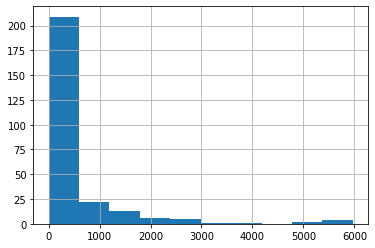

In [85]:
lifetime.duration.hist()

In [86]:
lifetime.duration.median()

27.299780092592595

#Задание 4

Дана статистика услуг перевозок клиентов компании по типам (см. файл “Python_13_join.ipynb” в разделе Материалы для лекции «Продвинутый pandas»).

Необходимо сформировать две таблицы:

таблицу с тремя типами выручки для каждого client_idбез указания адреса клиента
аналогичную таблицу по типам выручки с указанием адреса клиента

Дана статистика услуг перевозок клиентов компании по типам:

rzd - железнодорожные перевозки
auto - автомобильные перевозки
air - воздушные перевозки
client_base - адреса клиентов

In [88]:
rzd = pd.DataFrame(
    {
        'client_id': [111, 112, 113, 114, 115],
        'rzd_revenue': [1093, 2810, 10283, 5774, 981]
    }
)
rzd

,client_id,rzd_revenue
0,111,1093
1,112,2810
2,113,10283
3,114,5774
4,115,981


In [89]:
auto = pd.DataFrame(
    {
        'client_id': [113, 114, 115, 116, 117],
        'auto_revenue': [57483, 83, 912, 4834, 98]
    }
)
auto

,client_id,auto_revenue
0,113,57483
1,114,83
2,115,912
3,116,4834
4,117,98


In [90]:
air = pd.DataFrame(
    {
        'client_id': [115, 116, 117, 118],
        'air_revenue': [81, 4, 13, 173]
    }
)
air

,client_id,air_revenue
0,115,81
1,116,4
2,117,13
3,118,173


In [91]:
client_base = pd.DataFrame(
    {
        'client_id': [111, 112, 113, 114, 115, 116, 117, 118],
        'address': ['Комсомольская 4', 'Энтузиастов 8а', 'Левобережная 1а', 'Мира 14', 'ЗЖБИиДК 1', 
                    'Строителей 18', 'Панфиловская 33', 'Мастеркова 4']
    }
)
client_base

,client_id,address
0,111,Комсомольская 4
1,112,Энтузиастов 8а
2,113,Левобережная 1а
3,114,Мира 14
4,115,ЗЖБИиДК 1
5,116,Строителей 18
6,117,Панфиловская 33
7,118,Мастеркова 4


In [92]:
data =\
    rzd.merge(auto, how='outer', on='client_id').\
        merge(air, how='outer', on='client_id').fillna("-")
data.head()

,client_id,rzd_revenue,auto_revenue,air_revenue
0,111,1093.0,-,-
1,112,2810.0,-,-
2,113,10283.0,57483.0,-
3,114,5774.0,83.0,-
4,115,981.0,912.0,81.0


In [93]:
data_client =\
    data.merge(client_base, how='outer', on='client_id').fillna("-")
data_client

,client_id,rzd_revenue,auto_revenue,air_revenue,address
0,111,1093.0,-,-,Комсомольская 4
1,112,2810.0,-,-,Энтузиастов 8а
2,113,10283.0,57483.0,-,Левобережная 1а
3,114,5774.0,83.0,-,Мира 14
4,115,981.0,912.0,81.0,ЗЖБИиДК 1
5,116,-,4834.0,4.0,Строителей 18
6,117,-,98.0,13.0,Панфиловская 33
7,118,-,-,173.0,Мастеркова 4
